## Accessing Data Cube
To begin, run following in terminal:
$ module load agdc-py3-prod



Then run 'jupyter notebook' from same terminal.


In [1]:
%matplotlib inline
import datacube
import pandas
pandas.set_option('display.max_colwidth', 200)
pandas.set_option('display.max_rows', None)
from datacube.storage.masking import mask_invalid_data

In [2]:
#app is a note to let GA know what we are doing with it, user-defined
#when loading data, #make sure data is on same coordinate scale or convert 
dc=datacube.Datacube(app='learn-data-access')
dc

Datacube<index=Index<db=PostgresDb<engine=Engine(postgresql://jbw156@130.56.244.105:6432/datacube)>>>

In [3]:
products = dc.list_products()
products.columns.tolist()


['name',
 'description',
 'gqa_ref_source',
 'gqa_error_message',
 'gqa',
 'lon',
 'format',
 'gqa_iterative_stddev_xy',
 'gqa_stddev_xy',
 'instrument',
 'product_type',
 'gqa_final_gcp_count',
 'gqa_abs_iterative_mean_xy',
 'gqa_cep90',
 'gqa_abs_xy',
 'sat_path',
 'orbit',
 'gqa_iterative_mean_xy',
 'sat_row',
 'time',
 'ancillary_quality',
 'gqa_mean_xy',
 'gsi',
 'lat',
 'platform',
 'crs',
 'resolution',
 'tile_size',
 'spatial_dimensions']

In [5]:
display_columns = ['name', 'description', 'platform', 'product_type', 'instrument', 'crs', 'resolution']
# #list only nbar products
nbar_list = products[products['product_type'] == 'nbar'][display_columns].dropna()
# productlist = products[display_columns].dropna()
nbar_list

,name,description,platform,product_type,instrument,crs,resolution
id,,,,,,,
6,ls5_nbar_albers,"Landsat 5 Surface Reflectance NBAR 25 metre, 100km tile, Australian Albers Equal Area projection (EPSG:3577)",LANDSAT_5,nbar,TM,EPSG:3577,"[-25, 25]"
21,ls7_nbar_albers,"Landsat 7 Surface Reflectance NBAR 25 metre, 100km tile, Australian Albers Equal Area projection (EPSG:3577)",LANDSAT_7,nbar,ETM,EPSG:3577,"[-25, 25]"
19,ls8_nbar_albers,"Landsat 8 Surface Reflectance NBAR 25 metre, 100km tile, Australian Albers Equal Area projection (EPSG:3577)",LANDSAT_8,nbar,OLI_TIRS,EPSG:3577,"[-25, 25]"
60,ls8_nbar_oli_albers,"Landsat 8 Surface Reflectance NBAR 25 metre, 100km tile, Australian Albers Equal Area projection (EPSG:3577)",LANDSAT_8,nbar,OLI,EPSG:3577,"[-25, 25]"


In [6]:
measurements = dc.list_measurements()
measurements.columns.tolist()

['aliases',
 'dtype',
 'flags_definition',
 'name',
 'nodata',
 'spectral_definition',
 'units']

In [7]:
display_columns = ['units', 'nodata', 'aliases']
# display meausrements for one product
measurements[display_columns].loc['ls8_nbar_albers']


,units,nodata,aliases
measurement,,,
coastal_aerosol,1,-999,"[band_1, coastal_aerosol]"
blue,1,-999,"[band_2, blue]"
green,1,-999,"[band_3, green]"
red,1,-999,"[band_4, red]"
nir,1,-999,"[band_5, nir]"
swir1,1,-999,"[band_6, swir1]"
swir2,1,-999,"[band_7, swir2]"


In [8]:
#display measurements in all nbar products
m_list = nbar_list.name.tolist() #list of nbar measurements
measurements[display_columns].loc[m_list]

units nodata                    aliases
product             measurement                                            
ls5_nbar_albers     blue                1   -999             [band_1, blue]
                    green               1   -999            [band_2, green]
                    red                 1   -999              [band_3, red]
                    nir                 1   -999              [band_4, nir]
                    swir1               1   -999            [band_5, swir1]
                    swir2               1   -999            [band_7, swir2]
ls7_nbar_albers     blue                1   -999             [band_1, blue]
                    green               1   -999            [band_2, green]
                    red                 1   -999              [band_3, red]
                    nir                 1   -999              [band_4, nir]
                    swir1               1   -999            [band_5, swir1]
                    swir2               1   -999            [band_7, swir2]
ls8_nbar_albers     coastal_aerosol     1   -999  [band_1, coastal_aerosol]
                    blue                1   -999             [band_2, blue]
                    green               1   -999            [band_3, green]
                    red                 1   -999              [band_4, red]
                    nir                 1   -999              [band_5, nir]
                    swir1               1   -999            [band_6, swir1]
                    swir2               1   -999            [band_7, swir2]
ls8_nbar_oli_albers coastal_aerosol     1   -999  [band_1, coastal_aerosol]
                    blue                1   -999             [band_2, blue]
                    green               1   -999            [band_3, green]
                    red                 1   -999              [band_4, red]
                    nir                 1   -999              [band_5, nir]
                    swir1               1   -999            [band_6, swir1]
                    swir2               1   -999            [band_7, swir2]

In [28]:
query = {
    'time': ('2013-01-01', '2014-12-31'),
    'lat': (-35.2, -35.3),
    'lon': (149.0, 149.1),
}
#for landsat, even 1x1 degree for 4 yrs is too much data

In [29]:
# attempt landsat
#2 stars unpack the limits of our query, we load specific measurements from a product
data = dc.load(product='ls8_nbar_albers', measurements=['red','nir'], **query)
#mask invalid data removes clouds/shadows


In [30]:
data = mask_invalid_data(data)
data

<xarray.Dataset>
Dimensions:  (time: 110, x: 420, y: 490)
Coordinates:
  * time     (time) datetime64[ns] 2013-04-18T23:52:06 2013-04-18T23:52:30 ...
  * y        (y) float64 -3.947e+06 -3.947e+06 -3.947e+06 -3.947e+06 ...
  * x        (x) float64 1.539e+06 1.539e+06 1.539e+06 1.539e+06 1.539e+06 ...
Data variables:
    red      (time, y, x) float64 1.561e+03 1.516e+03 1.638e+03 1.687e+03 ...
    nir      (time, y, x) float64 3.378e+03 3.378e+03 3.568e+03 3.637e+03 ...
Attributes:
    crs:      EPSG:3577

In [31]:
data.time

<xarray.DataArray 'time' (time: 110)>
array(['2013-04-18T23:52:06.000000000', '2013-04-18T23:52:30.000000000',
       '2013-04-25T23:58:13.500000000', '2013-05-20T23:52:19.000000000',
       '2013-05-20T23:52:43.000000000', '2013-05-27T23:58:31.500000000',
       '2013-06-05T23:52:20.000000000', '2013-06-05T23:52:44.000000000',
       '2013-06-12T23:58:28.000000000', '2013-06-21T23:52:12.000000000',
       '2013-06-21T23:52:36.000000000', '2013-06-28T23:58:26.000000000',
       '2013-07-07T23:52:17.000000000', '2013-07-07T23:52:41.000000000',
       '2013-07-14T23:58:27.000000000', '2013-07-23T23:52:15.500000000',
       '2013-07-23T23:52:39.000000000', '2013-07-30T23:58:28.000000000',
       '2013-08-08T23:52:18.000000000', '2013-08-08T23:52:42.000000000',
       '2013-08-15T23:58:28.500000000', '2013-08-24T23:52:20.000000000',
       '2013-08-24T23:52:44.000000000', '2013-08-31T23:58:31.000000000',
       '2013-09-09T23:52:18.000000000', '2013-09-09T23:52:42.000000000',
       '2013-

In [23]:
ndvi = (data.nir-data.red)/(data.nir+data.red)
ndvi

MemoryError: 

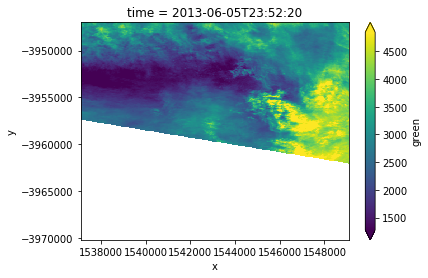

In [21]:
data.green.isel(time=6).plot.imshow(robust=True) 

In [25]:
# ## attempt MODIS
# #2 stars unpack the limits of our query, we load specific measurements from a product
# data = dc.load(product='modis_mcd43a3_tile', measurements=['BRDF_Albedo_Band_Mandatory_Quality_Band1', 'Nadir_reflectance_Band2', 'Nadir_reflectance_Band3'], **query)
# #mask invalid data removes clouds/shadows
# data = mask_invalid_data(data)
# data

<xarray.Dataset>
Dimensions:  ()
Data variables:
    *empty*